## Time Series Made Easy in Python USing Darts Library

In [6]:
!pip install darts

In [3]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset

In [ ]:
AirPassengersDataset().load().pd_series()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Freq: MS, Length: 144, dtype: float64

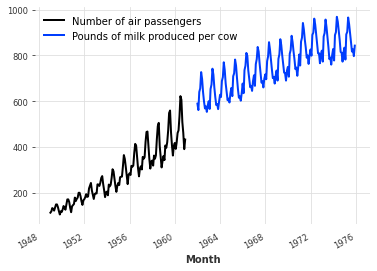

In [15]:
import matplotlib.pyplot as plt
series_air = AirPassengersDataset().load()
series_milk = MonthlyMilkDataset().load()

series_air.plot(label='Number of air passengers')
series_milk.plot(label='Pounds of milk produced per cow')
plt.legend();

In [8]:
pip uninstall matplotlib


Found existing installation: matplotlib 3.4.3
Uninstalling matplotlib-3.4.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.4.3


In [9]:
pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 5.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
darts 0.12.0 requires matplotlib>=3.4.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


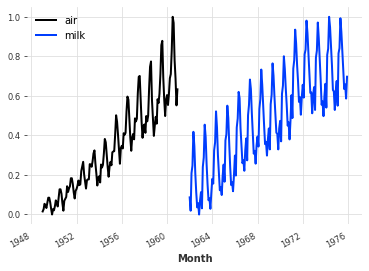

In [10]:
from darts.dataprocessing.transformers import Scaler
scaler_air, scaler_milk = Scaler(), Scaler()
series_air_scaled = scaler_air.fit_transform(series_air)
series_milk_scaled = scaler_milk.fit_transform(series_milk)

series_air_scaled.plot(label='air')
series_milk_scaled.plot(label='milk')
plt.legend();

In [11]:
# Train And Validation Split
train_air, val_air = series_air_scaled[:-36], series_air_scaled[-36:]
train_milk, val_milk = series_milk_scaled[:-36], series_milk_scaled[-36:]

In [12]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape

In [13]:
model_air_milk = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=0)

In [14]:
model_air_milk.fit([train_air, train_milk], verbose=True)

[2021-10-07 11:35:53,731] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
[2021-10-07 11:35:53,731] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
[2021-10-07 11:35:53,832] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-10-07 11:35:53,832] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
  1%|          | 1/100 [00:01<02:30,  1.52s/it]

 11%|█         | 11/100 [00:16<02:16,  1.54s/it]

 21%|██        | 21/100 [00:42<04:03,  3.08s/it]

 31%|███       | 31/100 [01:16<03:52,  3.37s/it]

 41%|████      | 41/100 [01:50<03:24,  3.47s/it]

 51%|█████     | 51/100 [02:23<02:48,  3.45s/it]

 61%|██████    | 61/100 [02:56<02:09,  3.32s/it]

 71%|███████   | 71/100 [03:28<01:27,  3.01s/it]

 81%|████████  | 81/100 [04:01<01:03,  3.32s/it]

 91%|█████████ | 91/100 [04:35<00:30,  3.42s/it]

100%|██████████| 100/100 [05:03<00:00,  3.04s/it]


MAPE = 5.51%


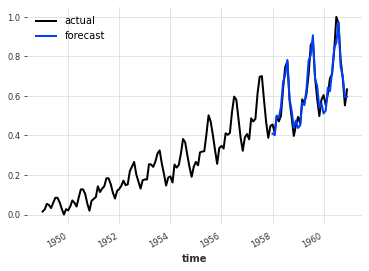

In [16]:
pred = model_air_milk.predict(n=36, series=train_air)

series_air_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend();
print('MAPE = {:.2f}%'.format(mape(series_air_scaled, pred)))

MAPE = 13.84%


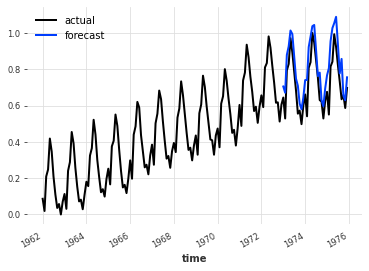

In [ ]:
pred = model_air_milk.predict(n=36, series=train_milk)

series_milk_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend();
print('MAPE = {:.2f}%'.format(mape(series_milk_scaled, pred)))